In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb #extra, just to visualize the multi-class confusion matrix

## Handwritten Digit Recognition
### Modified National Institute of Standards and Technology (MNIST) Dataset
#### Download the data from [Kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv)
There is a training set and a test set available in this dataset. Every row corresponds to a handwritten digit. The first column is named `label`, which is the true digit that was written ($0-9$).

For more information on this dataset, please see the [official page](http://yann.lecun.com/exdb/mnist/), which includes:
- "The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image."

Moreover, there are $28 \times 28$ predictors in the dataset. To understsand their meaning, we refer to the same page again:
- "The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field."

**Q1: Load the training and test sets as Pandas dataframes.**

In [4]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [5]:
print("Training set shape:", train.shape, "test set shape:", test.shape)

Training set shape: (60000, 785) test set shape: (10000, 785)


**Q2: Plot (with a histogram) the distribution of the digits in the training set. Report if there are missing values (if yes, drop such rows).**

In [6]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.columns #784 pixels + label

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

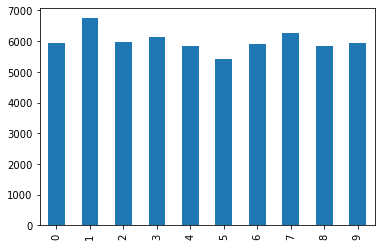

In [8]:
train.label.value_counts()[[0,1,2,3,4,5,6,7,8,9]].plot(kind='bar');

In [9]:
np.sum(train.isnull().sum()) + np.sum(test.isnull().sum()) #equal to zero, no nulls at all

0

**Q3: Visualize whichever row you like below.**

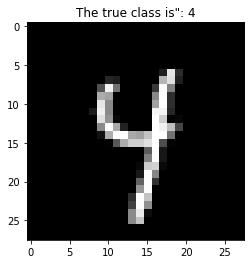

In [10]:
instance = 26 #change this freely to see different visualizations
plt.imshow(np.reshape(np.array(train.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i' %train.iloc[instance, 0])
plt.show()

**Q4: Train a linear Kernel SVM based classifier (linear SVC) on the training set after standardizing the data appropriately.**

In [11]:
#First standardize
train_X = train.iloc[:,1:] #predictors of the training set
train_y = train.label #targets (true digits) of the training set
test_X = test.iloc[:,1:] #predictors of the test set
test_y = test.label #targets (true digits) of the test set

#only standardize the predictors. Keep the code below.
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(train_X)
train_X = scaling.transform(train_X)
test_X = scaling.transform(test_X)

In [12]:
lin_clf = svm.SVC(kernel='linear') #runs the one-versus-rest approach in multi-class classification
lin_clf.fit(train_X, train_y) #allow this to run for up to 25 minutes

SVC(kernel='linear')

**Q5: Plot the confusion matrix obtained in the training set and report the accuracy.**

In [13]:
pred = lin_clf.predict(train_X)

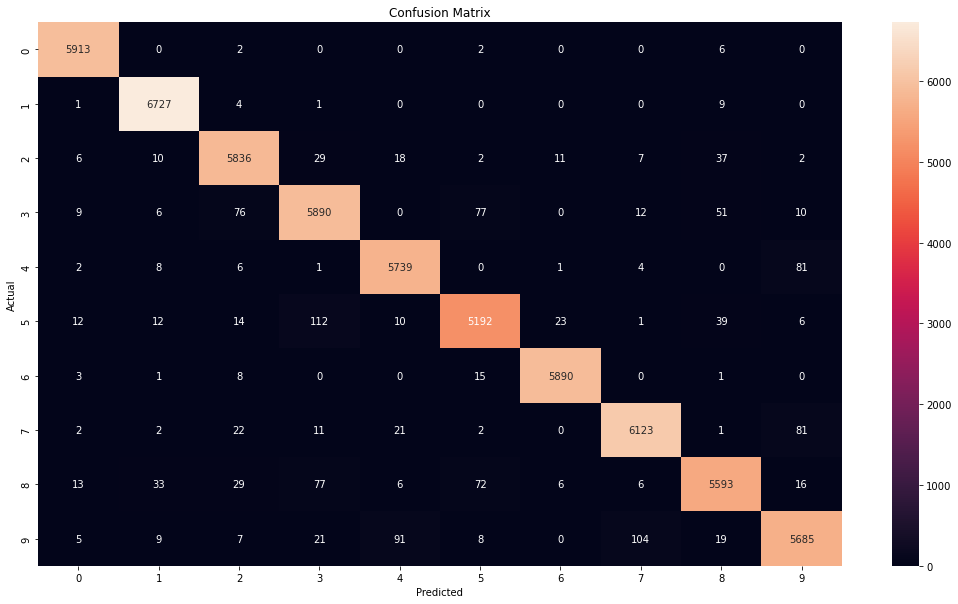

In [14]:
cm = confusion_matrix(train_y, pred)
plt.subplots(figsize=(18,10))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
accuracy_score(train_y, pred) #97.64% training accuracy

0.9764666666666667

**Q6: Plot the confusion matrix obtained in the test set and report the accuracy.**

In [16]:
pred = lin_clf.predict(test_X)

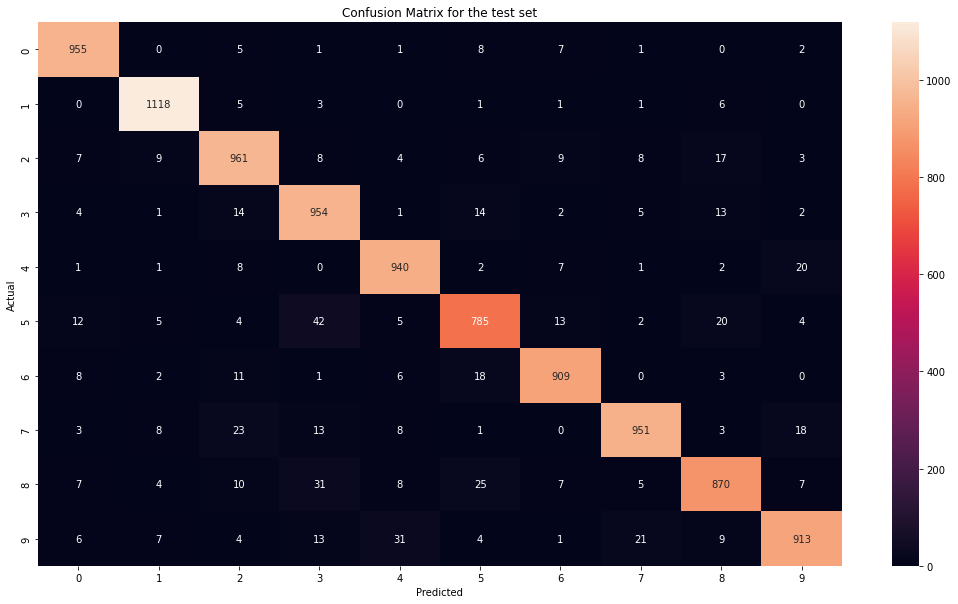

In [17]:
cm = confusion_matrix(test_y, pred)
plt.subplots(figsize=(18,10))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for the test set")
plt.show()

In [18]:
accuracy_score(test_y, pred) #93.5% test accuracy -- looks pretty strong!

0.9356

**Q7: Visualize one test digit which we correctly classified, and another one we misclassified**

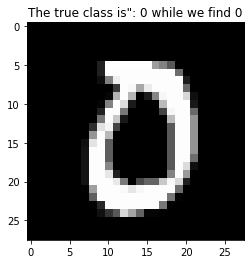

In [19]:
instance = 28 #correct classification
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (test_y[instance], pred[instance]))
plt.show()

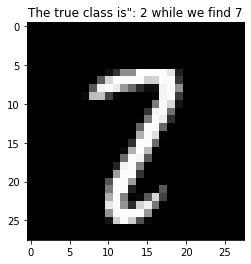

In [20]:
instance = 321#wrong classification -- well it makes "sense" as it really looks like 7 :)
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (test_y[instance], pred[instance]))
plt.show()

**Q8: Find a test digit that is originally 4, but we predicted as 3. Plot this digit. Interpret the result.**

In [1]:
for i in range(len(test_y)):
    if test_y[i] == 4 and pred[i] == 3:
        print(i)

NameError: name 'test_y' is not defined

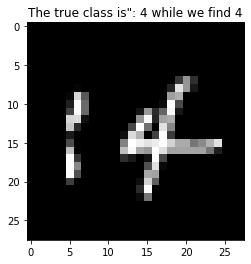

In [22]:
instance = 5676#wrong classification -- well it makes "sense" as it really looks like 7 :)
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (test_y[instance], pred[instance]))
plt.show()
#Answer: we can see that there are two disconnected shapes

**Q9: Try the radial Kernel in your SVM classification. Keep the other parameters default.**

In [ ]:
clf = svm.SVC(kernel = 'rbf') #runs the one-versus-one approach in multi-class classification
clf.fit(train_X, train_y) #allow this to run for up to 25 minutes

**Q10: Visualize the test-set confusion matrix and report the test accuracy of this model.**

In [ ]:
pred = clf.predict(test_X)

In [ ]:
cm = confusion_matrix(test_y, pred)
plt.subplots(figsize=(18,10))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for the test set")
plt.show()

In [ ]:
accuracy_score(test_y, pred)

**Q11: Discuss whether the linear or radial Kernel gives better results.**

- Answer: Radial Kernel clearly gives the best result. This can be read in the main [documentation](http://yann.lecun.com/exdb/mnist/). 
- Moreover, training polynomial Kernel with degree 4 would also give a very good performance according to the reported results in this souce.

**(Optional question): By using cross-validation, compare SVCs with different Kernels, parameters, as well as one-versus-one approach. Report the test error of the model picked.**

Note that, if you implemented correctly, you will already have close to 98% test set accuracy via simplest forms of SVMs. Hence, it will be an interesting task for you to tune additional parameters via cross-validation, and to see if the test performance can be improved even further.